In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
from helpers import split_data_set, view_dataset_batches, convert_to_gray_scale, get_class_distribution, plot_bar, plot_pie

In [3]:
from vars import IMAGE_SIZE, DATASET_DIRECTORY, BATCH_SIZE, TRAINING_SIZE, SHUFFLE_SIZE, SEED, COLORS, EPOCHS, FILTER_SIZE, INPUT_SHAPE, POOLING_SIZE, FILTERS_NUMBER, HUGE_FILTER_SIZE

<h1>Fetch Data From Dataset</h1>

In [4]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    DATASET_DIRECTORY,
    shuffle=True,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 7885 files belonging to 26 classes.


In [5]:
class_names = dataset.class_names
class_names

['Acrylic',
 'Artificial_fur',
 'Artificial_leather',
 'Blended',
 'Chenille',
 'Corduroy',
 'Cotton',
 'Crepe',
 'Denim',
 'Felt',
 'Fleece',
 'Fur',
 'Leather',
 'Linen',
 'Lut',
 'Nylon',
 'Polyester',
 'Satin',
 'Silk',
 'Suede',
 'Terrycloth',
 'Unclassified',
 'Utilities',
 'Velvet',
 'Viscose',
 'Wool']

In [6]:
n_classes = len(class_names)
n_classes

26

In [7]:
len(dataset)

247

In [8]:
for image_batch, label_batch in dataset.take(1):
    print("Image shape:", image_batch.shape)
    print("Image class:", label_batch.numpy())

Image shape: (32, 400, 400, 3)
Image class: [25  8  3  6  8 25 15  6  6  8  6 18 23  8  6  6  3  9 20 21  6  3 21 25
 24  6 24  6 25  6  3  6]


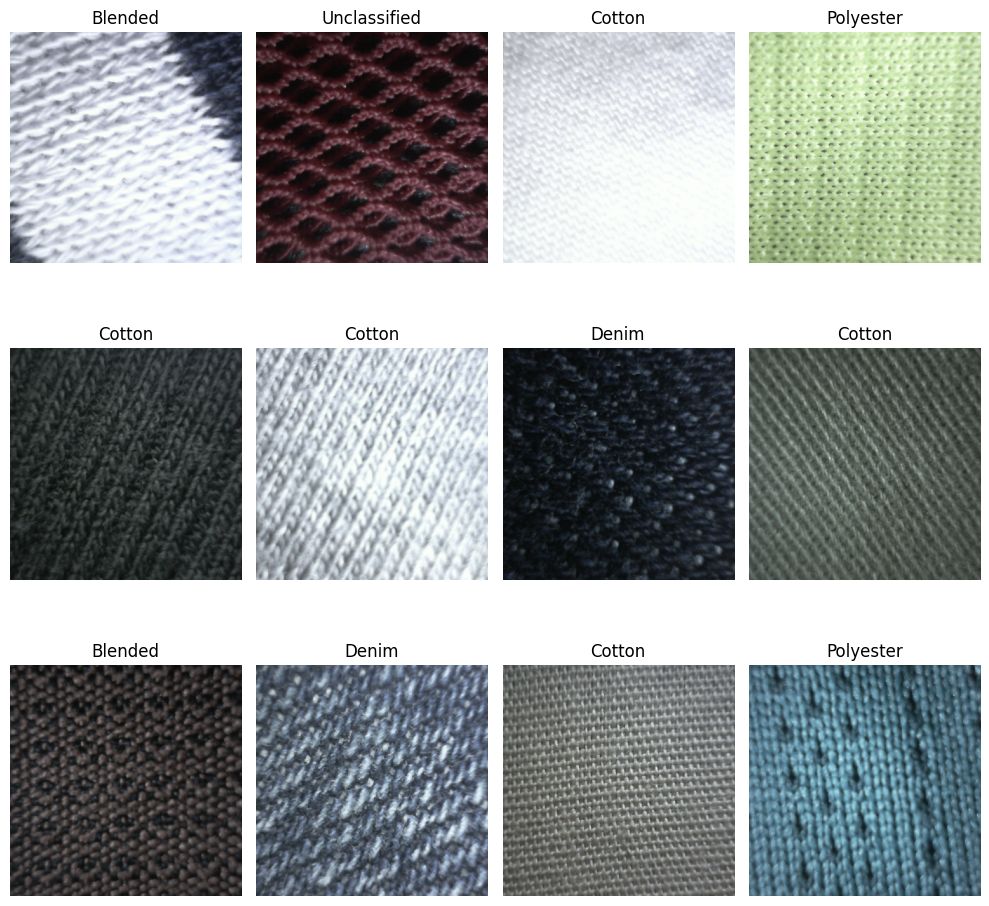

In [9]:
view_dataset_batches(dataset, class_names)

<p>Convert to gray scale</p>

In [10]:
dataset = dataset.map(convert_to_gray_scale)

<h1>Split data</h1>
<h4 style="margin-bottom: 8px;">we will split the dataset to:</h4>
<p style="margin: 0;">80% ==> training</p>
<p style="margin: 0;">20% ==> 10% validation, 10% test</p>

In [11]:
training_ds, validation_ds, testing_ds = split_data_set(dataset, TRAINING_SIZE, 0.1, True, SHUFFLE_SIZE, SEED)

In [12]:
len(training_ds)

197

In [13]:
len(validation_ds)

24

In [14]:
len(testing_ds)

26

In [15]:
training_ds = training_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
validation_ds = validation_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
testing_ds = testing_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)

In [16]:
for image_batch, label_batch in dataset.take(1):
    print("Image shape:", image_batch.shape)
    print("Image class:", label_batch.numpy())

Image shape: (32, 400, 400, 1)
Image class: [ 8 15 16 16  6  6  3  8  6  6  3  6 13  6 25  6 16 18  6  4  3 12 10 25
 25 16  6  6  3  8 16 16]


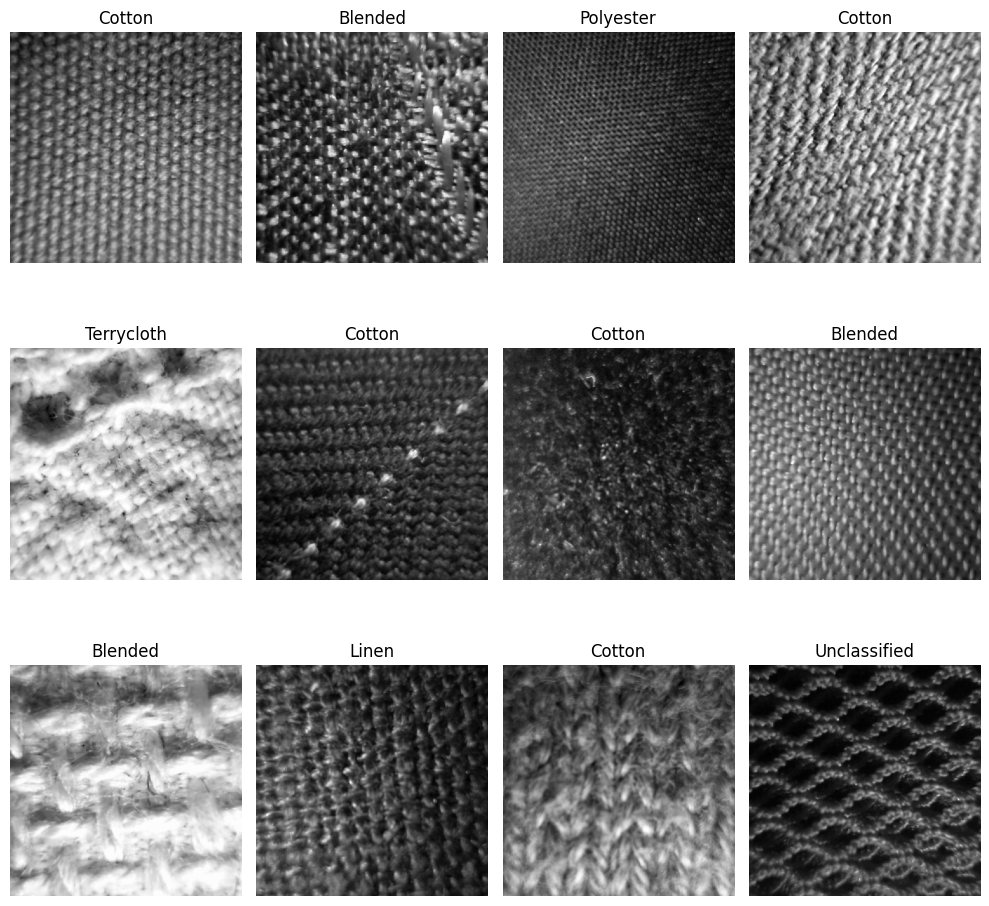

In [17]:
view_dataset_batches(dataset, class_names, is_gray=True)

<h1>Understand and see the dataset</h1>

In [18]:
train_counts = get_class_distribution(training_ds, class_names)
train_counts

,Class,Count
0,Cotton,1872
1,Blended,1304
2,Polyester,723
3,Denim,517
4,Unclassified,386
5,Wool,290
6,Nylon,189
7,Silk,156
8,Viscose,121
9,Fleece,107


In [19]:
validation_counts = get_class_distribution(validation_ds, class_names)
validation_counts

,Class,Count
0,Cotton,236
1,Blended,169
2,Polyester,96
3,Denim,63
4,Unclassified,37
5,Wool,34
6,Nylon,21
7,Silk,18
8,Terrycloth,14
9,Fleece,13


In [20]:
test_counts = get_class_distribution(testing_ds, class_names)
test_counts

,Class,Count
0,Cotton,251
1,Blended,178
2,Polyester,93
3,Denim,73
4,Unclassified,39
5,Wool,38
6,Nylon,28
7,Silk,21
8,Fleece,15
9,Crepe,14


<p style="color: #e01; font-size: 23px;">Training dataset</p>

c:\development\projects\fabric-classification\model\helpers.py:82: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data, x='Class', y='Count', palette=COLORS)
c:\development\projects\fabric-classification\model\helpers.py:82: UserWarning: 
The palette list has fewer values (12) than needed (25) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(data=data, x='Class', y='Count', palette=COLORS)


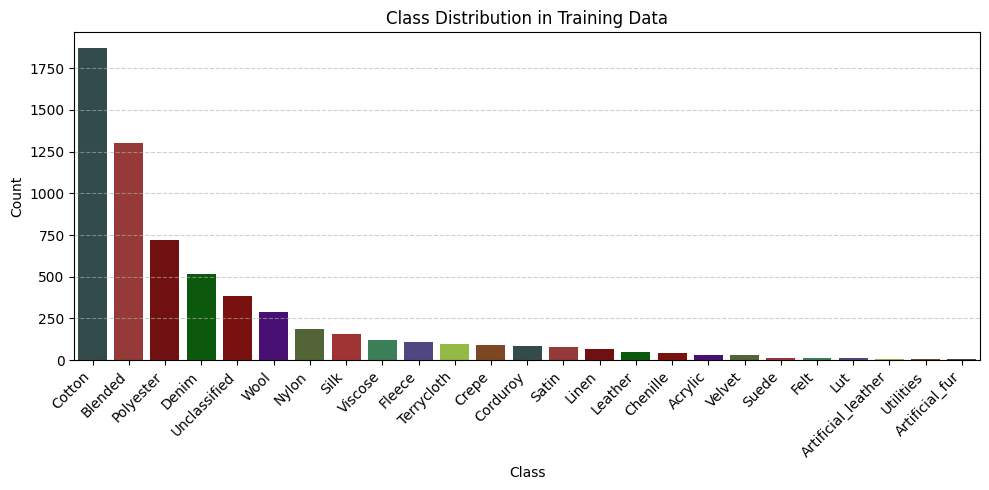

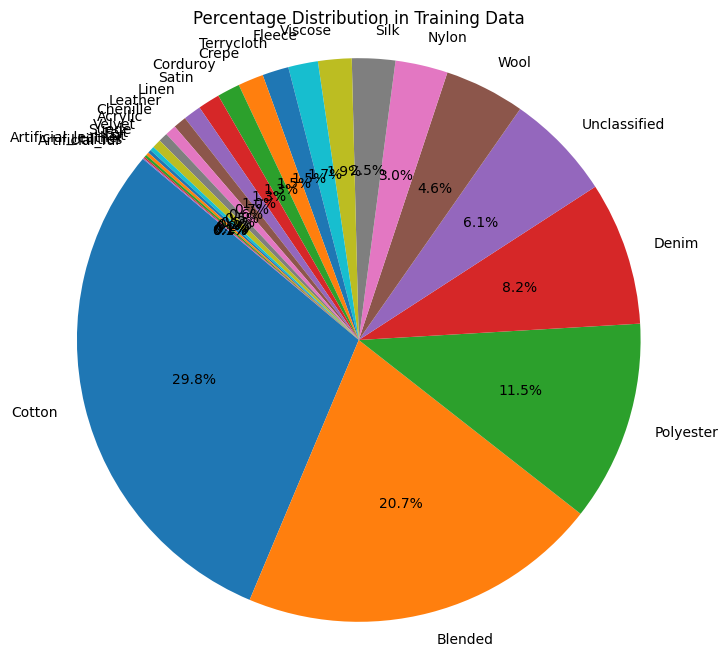

In [21]:
plot_bar(train_counts, "Class Distribution in Training Data")
plot_pie(train_counts, "Percentage Distribution in Training Data")

<p style="color: #0e1; font-size: 23px;">Validation dataset</p>

c:\development\projects\fabric-classification\model\helpers.py:82: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data, x='Class', y='Count', palette=COLORS)
c:\development\projects\fabric-classification\model\helpers.py:82: UserWarning: 
The palette list has fewer values (12) than needed (23) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(data=data, x='Class', y='Count', palette=COLORS)


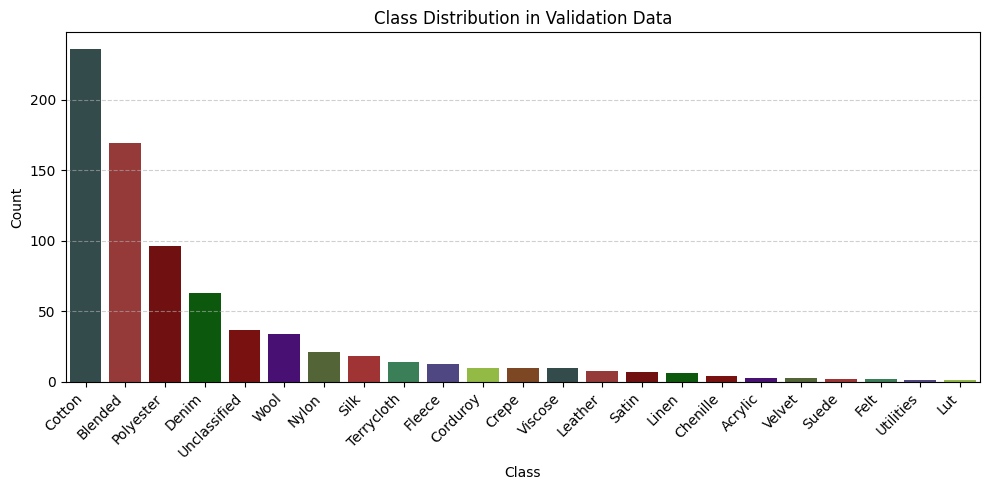

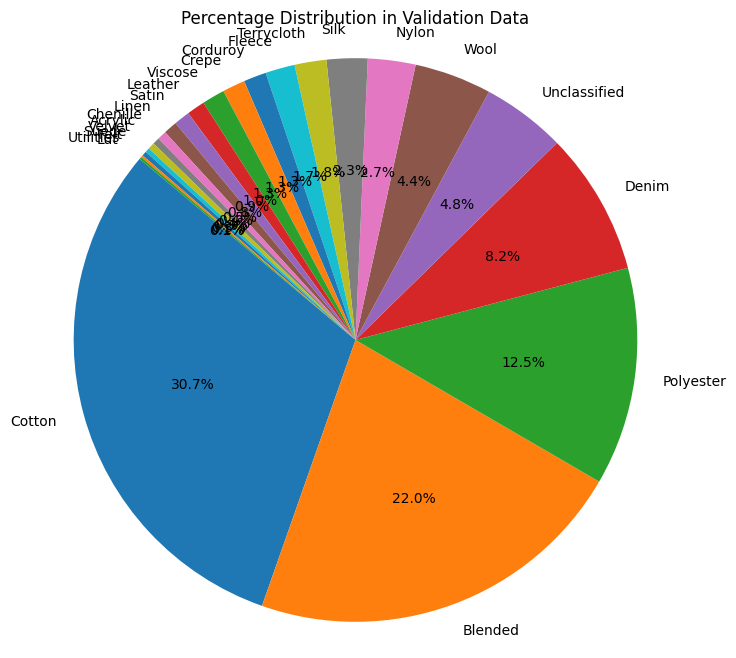

In [22]:
plot_bar(validation_counts, "Class Distribution in Validation Data")
plot_pie(validation_counts, "Percentage Distribution in Validation Data")

<p style="color: #1ee; font-size: 23px;">Testing dataset</p>

c:\development\projects\fabric-classification\model\helpers.py:82: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data, x='Class', y='Count', palette=COLORS)
c:\development\projects\fabric-classification\model\helpers.py:82: UserWarning: 
The palette list has fewer values (12) than needed (24) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(data=data, x='Class', y='Count', palette=COLORS)


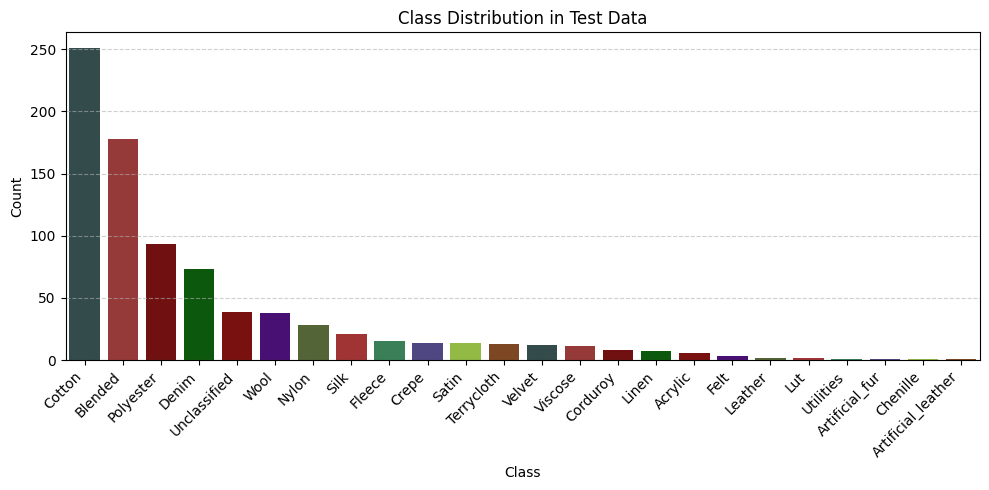

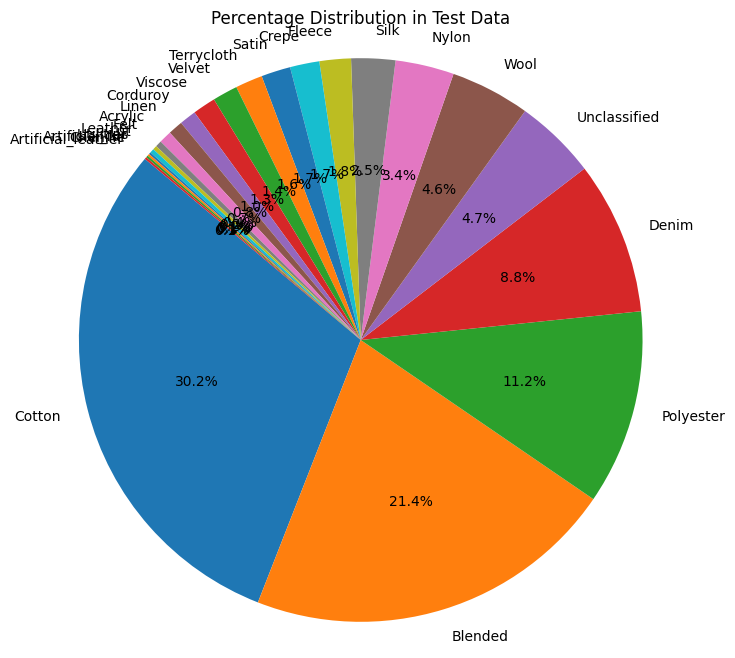

In [23]:
plot_bar(test_counts, "Class Distribution in Test Data")
plot_pie(test_counts, "Percentage Distribution in Test Data")

<p style="color: #e5ef23; font-size: 23px;">dataset</p>

In [24]:
merged_data = pd.merge(train_counts, validation_counts, on='Class', how='outer', suffixes=('_Train', '_Validation'))
merged_data = pd.merge(merged_data, test_counts, on='Class', how='outer')

In [25]:
merged_data.columns = ['Class', 'Train', 'Validation', 'Test']
merged_data

,Class,Train,Validation,Test
0,Acrylic,33,3.0,6.0
1,Artificial_fur,4,NaN,1.0
2,Artificial_leather,9,NaN,1.0
3,Blended,1304,169.0,178.0
4,Chenille,40,4.0,1.0
5,Corduroy,82,10.0,8.0
6,Cotton,1872,236.0,251.0
7,Crepe,92,10.0,14.0
8,Denim,517,63.0,73.0
9,Felt,12,2.0,3.0


In [26]:
merged_data = merged_data.sort_values(by='Class')
merged_data

,Class,Train,Validation,Test
0,Acrylic,33,3.0,6.0
1,Artificial_fur,4,NaN,1.0
2,Artificial_leather,9,NaN,1.0
3,Blended,1304,169.0,178.0
4,Chenille,40,4.0,1.0
5,Corduroy,82,10.0,8.0
6,Cotton,1872,236.0,251.0
7,Crepe,92,10.0,14.0
8,Denim,517,63.0,73.0
9,Felt,12,2.0,3.0


In [27]:
reshaped_data = merged_data.melt(id_vars='Class', value_vars=['Train', 'Validation', 'Test'],
                                var_name='Dataset', value_name='Count')
reshaped_data

,Class,Dataset,Count
0,Acrylic,Train,33.0
1,Artificial_fur,Train,4.0
2,Artificial_leather,Train,9.0
3,Blended,Train,1304.0
4,Chenille,Train,40.0
...,...,...,...
70,Unclassified,Test,39.0
71,Utilities,Test,1.0
72,Velvet,Test,12.0
73,Viscose,Test,11.0


C:\Users\basse\AppData\Local\Temp\ipykernel_708\2340749090.py:2: UserWarning: The palette list has more values (12) than needed (3), which may not be intended.
  sns.barplot(x='Class', y='Count', hue='Dataset', data=reshaped_data, palette=COLORS)


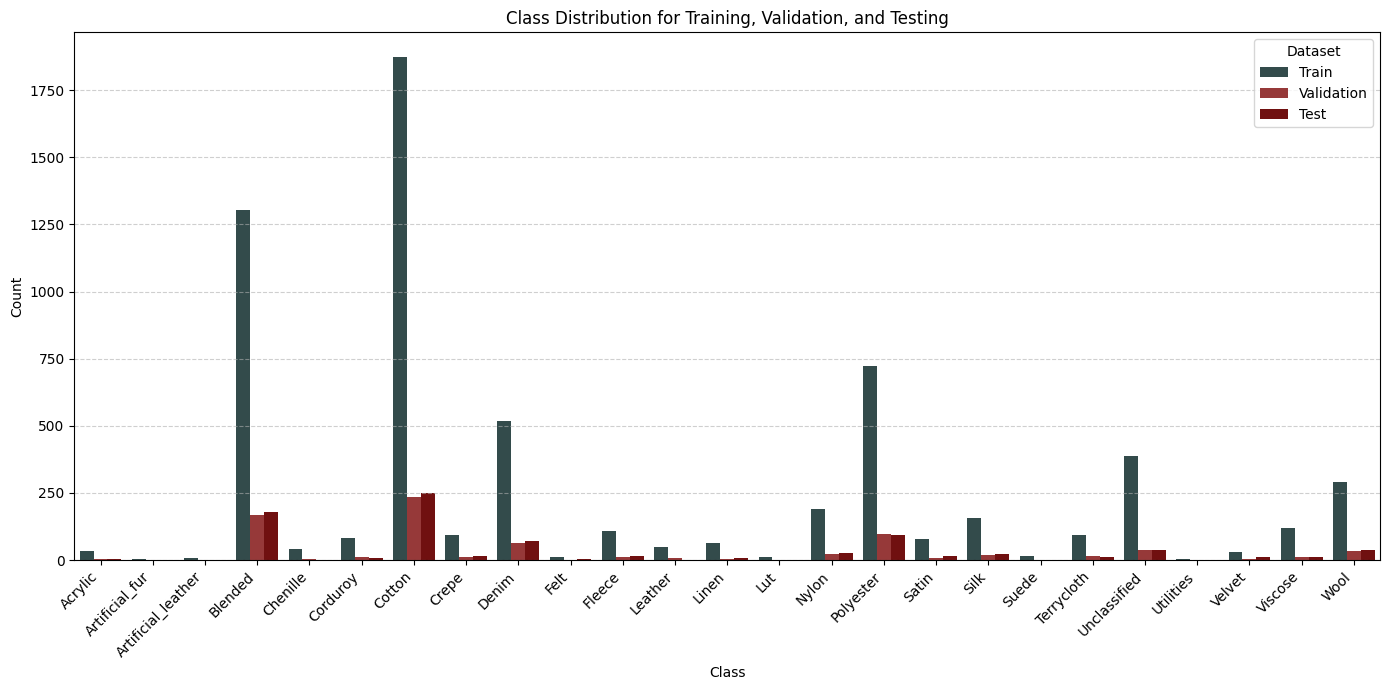

In [28]:
plt.figure(figsize=(14, 7))
sns.barplot(x='Class', y='Count', hue='Dataset', data=reshaped_data, palette=COLORS)
plt.title('Class Distribution for Training, Validation, and Testing')

plt.xticks(rotation=45, ha='right', fontsize=10)

plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()

plt.show()

<h1>Pre-processing</h1>

In [29]:
resize_and_rescale = tf.keras.Sequential([
    layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.Rescaling(1.0/255) 
])

<h1>Data Augmentation</h1>

In [30]:
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"), 
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.1),
    layers.RandomTranslation(0.1, 0.1),
    layers.RandomContrast(0.1),
    layers.RandomBrightness(0.2),
    layers.GaussianNoise(0.05),
])

In [31]:
model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(FILTERS_NUMBER, HUGE_FILTER_SIZE, activation="relu", input_shape = INPUT_SHAPE),
    layers.MaxPooling2D(POOLING_SIZE),
    layers.Conv2D(FILTERS_NUMBER * 2, HUGE_FILTER_SIZE, activation="relu"),
    layers.MaxPooling2D(POOLING_SIZE),
    layers.Conv2D(FILTERS_NUMBER * 2, FILTER_SIZE, activation="relu"),
    layers.MaxPooling2D(POOLING_SIZE),
    layers.Conv2D(FILTERS_NUMBER * 2, FILTER_SIZE, activation="relu"),
    layers.MaxPooling2D(POOLING_SIZE),
    layers.Conv2D(FILTERS_NUMBER * 2, FILTER_SIZE, activation="relu"),
    layers.MaxPooling2D(POOLING_SIZE),
    layers.Conv2D(FILTERS_NUMBER * 2, FILTER_SIZE, activation="relu", padding="same"),
    layers.MaxPooling2D(POOLING_SIZE),
    layers.LeakyReLU(alpha=0.2),
    layers.Flatten(),
    layers.Dense(64, activation="relu"),
    layers.Dense(n_classes, activation="softmax")
])

model.build(input_shape=INPUT_SHAPE)

c:\Users\basse\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\basse\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


In [32]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                     ┃ Output Shape             ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)          │ (32, 400, 400, 1)        │             0 │
├──────────────────────────────────┼──────────────────────────┼───────────────┤
│ sequential_1 (Sequential)        │ (32, 400, 400, 1)        │             0 │
├──────────────────────────────────┼──────────────────────────┼───────────────┤
│ conv2d (Conv2D)                  │ (32, 396, 396, 32)       │           832 │
├──────────────────────────────────┼──────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)     │ (32, 198, 198, 32)       │             0 │
├──────────────────────────────────┼──────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)                │ (32, 194, 194, 64)       │        51,264 │
├──────────────────────────────────┼──────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)   │ (32, 97, 97, 64)         │             0 │
├──────────────────────────────────┼──────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)                │ (32, 95, 95, 64)         │        36,928 │
├──────────────────────────────────┼──────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)   │ (32, 47, 47, 64)         │             0 │
├──────────────────────────────────┼──────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)                │ (32, 45, 45, 64)         │        36,928 │
├──────────────────────────────────┼──────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)   │ (32, 22, 22, 64)         │             0 │
├──────────────────────────────────┼──────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)                │ (32, 20, 20, 64)         │        36,928 │
├──────────────────────────────────┼──────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)   │ (32, 10, 10, 64)         │             0 │
├──────────────────────────────────┼──────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)                │ (32, 10, 10, 64)         │        36,928 │
├──────────────────────────────────┼──────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)   │ (32, 5, 5, 64)           │             0 │
├──────────────────────────────────┼──────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)          │ (32, 5, 5, 64)           │             0 │
├──────────────────────────────────┼──────────────────────────┼───────────────┤
│ flatten (Flatten)                │ (32, 1600)               │             0 │
├──────────────────────────────────┼──────────────────────────┼───────────────┤
│ dense (Dense)                    │ (32, 64)                 │       102,464 │
├──────────────────────────────────┼──────────────────────────┼───────────────┤
│ dense_1 (Dense)                  │ (32, 26)                 │         1,690 │
└──────────────────────────────────┴──────────────────────────┴───────────────┘

 Total params: 303,962 (1.16 MB)

 Trainable params: 303,962 (1.16 MB)

 Non-trainable params: 0 (0.00 B)

In [33]:
model.compile(
    optimizer="adam",
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=["accuracy"]
)

<h1>Model training</h1>

In [34]:
history = model.fit(
    training_ds,
    epochs=EPOCHS,
    verbose=1,
    validation_data=validation_ds
)

Epoch 1/50
197/197 ━━━━━━━━━━━━━━━━━━━━ 494s 2s/step - accuracy: 0.2716 - loss: 2.5773 - val_accuracy: 0.3073 - val_loss: 2.2324
Epoch 2/50
 11/197 ━━━━━━━━━━━━━━━━━━━━ 7:36 2s/step - accuracy: 0.2773 - loss: 2.3814

KeyboardInterrupt: 

<h1>Model showing results</h1>

In [ ]:
acc = history.history["accuracy"]
acc

In [ ]:
val_acc = history.history["val_accuracy"]
val_acc

In [ ]:
recall = history.history["recall"]
recall

In [ ]:
val_recall = history.history["val_recall"]
val_recall

In [ ]:
loss = history.history["loss"]
loss

In [ ]:
val_loss = history.history["val_loss"]
val_loss

In [ ]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label="Training Accuracy")
plt.plot(range(EPOCHS), val_acc, label="Validation Accuracy")
plt.legend(loc="lower right")
plt.title("Training and Validation Accuracy")

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label="Training Loss")
plt.plot(range(EPOCHS), val_loss, label="Validation Loss")
plt.legend(loc="upper right")
plt.title("Training and Validation Loss")

In [ ]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 3, 1)
plt.plot(range(EPOCHS), acc, label="Training Accuracy")
plt.plot(range(EPOCHS), val_acc, label="Validation Accuracy")
plt.legend(loc="lower right")
plt.title("Training and Validation Accuracy")

plt.figure(figsize=(8, 8))
plt.subplot(1, 3, 2)
plt.plot(range(EPOCHS), recall, label="Training Recall")
plt.plot(range(EPOCHS), val_recall, label="Validation Recall")
plt.legend(loc="lower right")
plt.title("Training and Validation Recall")

plt.subplot(1, 2, 3)
plt.plot(range(EPOCHS), loss, label="Training Loss")
plt.plot(range(EPOCHS), val_loss, label="Validation Loss")
plt.legend(loc="upper right")
plt.title("Training and Validation Loss")

In [ ]:
plt.figure(figsize=(15, 15))
for images, labels in testing_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy(), class_names)
        actual_class = class_names[labels[i]]
        
        plt.title(f"Actual: {actual_class},\n Prediction: {predicted_class},\n Confidence: {confidence}")
        plt.axis("off")

In [ ]:
model.export(f"../../model")